# Ad Tech Project

## Overview: 

The goal of the project is to demonstrate my technical abilities with both Python and Looker to complete a sample analysis for a hypothetical advertising tech company. Data was provided via Kaggle and downloaded to my laptop. Values were calculated for the average viewing times of video ads as well as the top 10 most visited websites in the US. Furthermore, some hypotheses about how device type impacts viewing times were provided. Finally, I assess the data quality and integrity of the provided dataset. This report should be read in tandem with the Looker Report, which is provided in a seperate file and which includes visualizations to help illustrate my findings. 

### 1: Average Viewing Times: 

I found the average watch time of video advertisements for users in the United States, France and the United Kingdom. The average watch times are 7.081 seconds, 7.355 seconds and 7.23 seconds respectively. These values were found by loading the data into a dataframe in Pandas, filtering for each country, then using the 'mean' function in Numpy to find the average of column 'seconds_played,' as it is the 'the observed time the video has been watched,' per the Kaggle description. Code is provided below. Moreover, the first graph on slide 1 of my Looker report confirms my findings from Python.

In [2]:
#Import relevant packages
import pandas as pd #version 2.1.4
import numpy as np #version 1.23.5
import matplotlib.pyplot as plt #3.8.0

#import Kagglehub and download files

#import kagglehub

#path = kagglehub.dataset_download("karnikakapoor/video-ads-engagement-dataset")

#print("Path to dataset files:", path)

In [2]:
#read the data using pandas
df = pd.read_csv("ad_df.csv")

In [3]:
#Filter the referer_deep_three column to get just the website, explained more in Question 2
df['Website'] = df['referer_deep_three'].str.split('/').str[1]

#Filter the df on only the users who watched in the US
USA_Data = df[df['ua_country'] == "us"]

#Calculate average and print value
Average_Viewing_Time_USA = USA_Data['seconds_played'].mean()
print("Average watch time in USA:", round(Average_Viewing_Time_USA, 3), "Seconds")

Average watch time in USA: 7.081 Seconds


In [4]:
#Filter the df on only the users who watched in France
France_Data = df[df['ua_country'] == "fr"]

#Calculate average and print value
Average_Viewing_Time_France = France_Data['seconds_played'].mean()
print("Average watch time in France:", round(Average_Viewing_Time_France, 3), "Seconds")

Average watch time in France: 7.355 Seconds


In [5]:
#Filter the df on only the users who watched in the UK
UK_Data = df[df['ua_country'] == "uk"]

#Calculate average and print value
Average_Viewing_Time_UK = UK_Data['seconds_played'].mean()
print("Average watch time in UK:", round(Average_Viewing_Time_UK, 3), "Seconds")

Average watch time in UK: 7.23 Seconds


### 2: Most Visited Websites 

I then found the ten most accessed websites by users in the US. I did so using the 'str.split' function in the third code chunk, which took the values from 'referer_deep_three' and isolated only the website name. I did this because I noticed that the ID values in 'website_id' would all correlate to the same website, even if 'referer_deep_three' may be different. For example, website_id 19190 always referred to 'com/washingtonpost/', but varied what the third part of the URL would be. To simplify this, I kept the website name that corresponded to each website_id and counted them. The websites and code used are provided below. The second graph on page 1 of my Looker report also contains a bar graph which accentuates how both the Washington Post and ESPN received far more visits than any other site, even the others in the top ten. Furthermore, the second column chart on page 2 in my Looker report examined the average viewing time of advertisements for the top five most visited websites (washingtonpost, espn, bet, lifedaily and slate). Interestingly, even though Life Daily qualified as a top five most visited website, its average viewing times were roughly half the viewing times of the Washington Post, the most visited website. This shows that even though many websites can have a lot of traffic, their advertising impact can vary greatly. 

In [6]:
#Counts the occurence of each website, stopping at only the top ten and providing the times accessed
Sites = USA_Data['Website'].value_counts().head(10)

print("The top ten most accessed websites in the USA:")
for website, count in Sites.items():
    print(f"{website}: {count}")

The top ten most accessed websites in the USA:
washingtonpost: 94464
espn: 79517
bet: 21178
lifedaily: 18145
slate: 17793
thedailybeast: 17258
time: 17133
cosmopolitan: 15461
iflscience: 15393
people: 14110


### 3: Viewing Time Breakdown

The device type used to watch an advertisement can have a big impact on how long a user watches a video. Below I calculated the average viewing time broken down by device type. I also found the longest advertisement people were willing to watch. While people on average watched ads for the least amount of time on their phones, the absolute longest someone watched an advertisement on television was signifcantly less than a computer, phone or tablet. 

My general hypothesis is that usually the smaller the screen, the stronger the instinct to just scroll to the next thing. But on a TV, I would guess people are more likely to watch something for longer without the urge to scroll, even on a smart TV. As for the gap in the maximum watch times, it is possible that targeted ad spots on smaller screens like phones, tablets and personal computers are more effective than those on the larger screens. However, I think it is more likely there was an issue in how the data was collected or recorded, which I expand on in Question 4. 

On the second page of my Looker report, I provided a column chart which breaks down not only the average viewing time by device, but also by the countries of interest in this report (US, France and UK). An interesting finding from this graph is that connected TV advertisements in the US averaged over 20 seconds of viewing time from the audience.

In [7]:
#Fill the empty device column entries with the values from the previous row
df['ua_device'] = df['ua_device'].fillna(method='ffill')

#Find average length a person watched an ad broken down by device 
Devices_Average = df.groupby('ua_device')['seconds_played'].mean()

#Print results
print("Average watch time in seconds by device:")
for device, avg_time in Devices_Average.items():
    print(f"{device}: {avg_time:.2f} seconds")

/var/folders/67/gpz3f5nd55l_q5hmg7yqg9ww0000gn/T/ipykernel_28305/1146520938.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ua_device'] = df['ua_device'].fillna(method='ffill')


Average watch time in seconds by device:
ConnectedTv: 9.61 seconds
PersonalComputer: 8.02 seconds
Phone: 6.19 seconds
Tablet: 7.73 seconds


In [8]:
#Find max length a person watched an ad broken down by device 
Devices_Max = df.groupby('ua_device')['seconds_played'].max()

#Print results
print("Max watch time in seconds by device:")
for device, max_time in Devices_Max.items():
    print(f"{device}: {max_time:.2f} seconds")

Max watch time in seconds by device:
ConnectedTv: 52.00 seconds
PersonalComputer: 135.00 seconds
Phone: 135.00 seconds
Tablet: 135.00 seconds


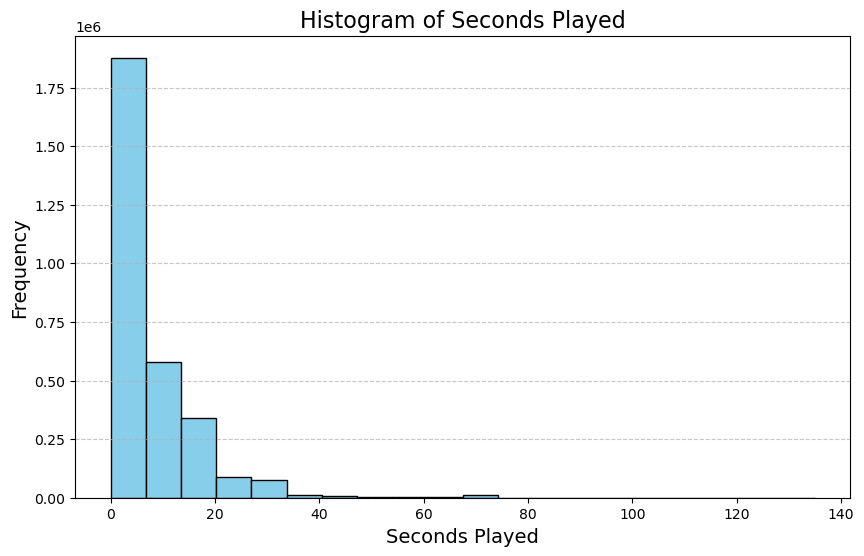

In [9]:
#Count the occurence of each length of ad
Seconds_Played_Dist = df['seconds_played'].value_counts()

#plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['seconds_played'].dropna(), bins=20, color='skyblue', edgecolor='black')


plt.title('Histogram of Seconds Played', fontsize=16)
plt.xlabel('Seconds Played', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

### 4: Review of Analysis and Shortcomings

Overall, the dataset provided from Kaggle was fairly well structured and did not require too much manipulation. However, there were several things I needed to do to ensure the integrity of the data. First, I had to explicitly parse the website name from the 'referer deep three' column. This ensured someone who went to the NBA section of ESPN was not marked as going to a different website as someone who went to the NFL section of ESPN. 

A second issue I encountered was that over 99% of the zone language values were French. This is suprsing, considering the most common country in the dataset is the US, which has a primary langauge of English. This leads me to believe there was an error in the data collection. While I did not personally do anything with languages, it is important to know about the dataset as a whole. 

Next, as discussed in section 3, the maximum time watching an advertisement seems dubious. I plotted the histogram above to observe the distribution, and while 135 was certainly recorded for phones, personal computers and tablets, I think it's highly likely there was an error in measuring the watch times over 100 seconds given how infrequent they are.

Another key data integrity issue was that the URL column, referred to as 'referer_deep_three', had quite a few missing/NA values. While this did not effect my answers about the most trafficked websites, it is important to note in the US there were over 20,000 empty/NA values, meaning there could have been an error in the collection process. 

The final data integrity issue I noticed is that the devices column had 198 missing values. Out of 3 million rows, this is likely unimportant. However, I still took it upon myself to fill the missing value with the device that was in the row preceding it. 

In [18]:
#Filtering the data to create visualizations in Looker

ad_df_filtered = df[['creative_duration', 'placement_language', 'ua_device', 'ua_country', 
                     'seconds_played', 'Website']]

#write data to CSV
ad_df_filtered.to_csv('ad_df_filtered.csv', index=False)